In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy.random as nr
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'power_plant_data.csv')
df

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Electrical Energy Output (EP)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
47835,15.12,48.92,1011.80,72.93,462.59
47836,33.41,77.95,1010.30,59.72,432.90
47837,15.99,43.34,1014.20,78.66,465.96
47838,17.65,59.87,1018.58,94.65,450.93


In [3]:
df.shape 

(47840, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature (T)                47840 non-null  float64
 1   Exhaust Vacuum (V)             47840 non-null  float64
 2   Ambient Pressure (AP)          47840 non-null  float64
 3   Relative Humidity (RH)         47840 non-null  float64
 4   Electrical Energy Output (EP)  47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [5]:
df.isna().sum()

Temperature (T)                  0
Exhaust Vacuum (V)               0
Ambient Pressure (AP)            0
Relative Humidity (RH)           0
Electrical Energy Output (EP)    0
dtype: int64

In [6]:
x = df.drop('Electrical Energy Output (EP)', axis = 1)
y = df['Electrical Energy Output (EP)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [8]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [9]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [10]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale = scaler_x.transform(X_train)
print(scaler_x.fit(X_test))
xtest_scale = scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale = scaler_y.transform(y_train)
print(scaler_y.fit(y_test))
ytest_scale = scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [25]:
model = Sequential()
model.add(Dense(12, input_dim = 4, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss = 'mse', 
              optimizer = 'adam', 
              metrics = ['mse','mae'])

In [27]:
nr.seed(9898)
tf.random.set_seed(9777)
history = model.fit(xtrain_scale, 
                    ytrain_scale, 
                    epochs = 4, 
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/4
225/225 [==============================] - 1s 3ms/step - loss: 0.0664 - mse: 0.0664 - mae: 0.1842 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0797
Epoch 2/4
225/225 [==============================] - 0s 2ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0721 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0679
Epoch 3/4
225/225 [==============================] - 0s 2ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0631 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0601
Epoch 4/4
225/225 [==============================] - 0s 2ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0558 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0534


In [28]:
model.evaluate(xtest_scale, ytest_scale)

374/374 [==============================] - 0s 1ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0540


[0.004801660776138306, 0.004801660776138306, 0.054015904664993286]

In [29]:
pred_train = model.predict(xtrain_scale)
print('RMSE for train data: ',np.sqrt(mean_squared_error(ytrain_scale,pred_train)))

RMSE for train data:  0.06726207464214502


In [30]:
pred = model.predict(xtest_scale)
print('RMSE for test data: ',np.sqrt(mean_squared_error(ytest_scale,pred)))

RMSE for test data:  0.0692940185991009


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


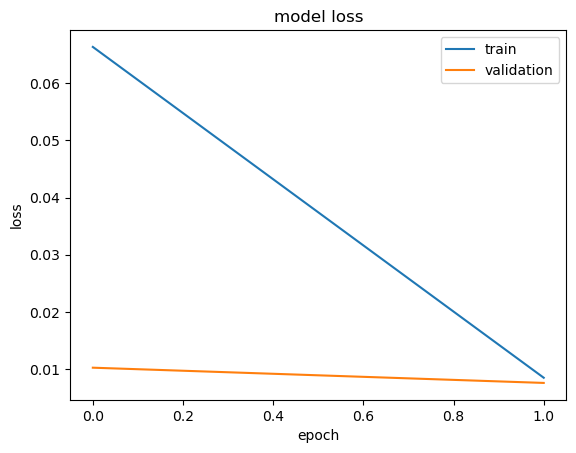

In [24]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()